# Project: Predictive Maintenance This project aims to predict equipment failure using historical maintenance data and sensor readings. The following steps outline the process for developing the predictive maintenance model.


Step 1: Data Collection
Gather historical maintenance data, sensor readings, and other relevant information from the equipment. Ensure that the dataset includes both normal and failure instances. If you don't have a dataset available, you can find suitable datasets from public repositories or use your own data.

Step 2: Data Preprocessing
The data needs to be cleaned and preprocessed before analysis. The following steps demonstrate the data preprocessing tasks using the pandas and NumPy libraries

In [1]:
import pandas as pd 
import numpy as np 


In [2]:
data= pd.read_csv('predictive_maintenance_dataset.csv')

In [3]:
print(data.head())

       date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3  


Step 2: Data Preprocessing


Handle Missing Values:
Check for missing values in the dataset and handle them accordingly. You can choose to drop columns or rows with missing values or impute values based on your project requirements. The example code drops columns with more than 50% missing values.

In [4]:
#check for missing values 
print(data.isnull().sum())

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


In [5]:
#drop columns which more than 50% missing values 
threshold= len(data)*0.5
data= data.dropna(thresh=threshold,axis=1)

In [6]:
print(data.columns)

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')


Step 3: Feature Engineering  
Feature engineering involves creating new features from the existing data to improve the predictive power of the model. The following examples demonstrate feature engineering techniques.



Compute Statistical Measures:
Calculate statistical measures such as mean and standard deviation of relevant columns.

In [7]:
#calculate statistical measures 
# Calculate statistical measures
# Example: Compute mean and standard deviation of relevant columns
mean_values = data[['metric1', 'metric2', 'metric3', 'metric4', 'metric5']].mean()
std_values = data[['metric1', 'metric2', 'metric3', 'metric4', 'metric5']].std()


Time-Based Features:    
Extract time-based features from the date column, such as hour of the day, day of the week, and month of the year.

In [8]:
# Extract time-based features from date
# Example: Extract hour of the day, day of the week, and month of the year
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month


Domain-Specific Knowledge:  
Incorporate domain-specific knowledge and create derived features based on that knowledge.

In [9]:
# Incorporate domain-specific knowledge and derived features
# Example: Create a derived feature based on domain knowledge
data['derived_feactures']=data['metric1']*data['metric2']

Step 4: Time Series Analysis
Time series analysis can help identify patterns, trends, and seasonality in the data. The following examples demonstrate time series analysis techniques.

Autocorrelation Analysis:  
Compute autocorrelation and plot autocorrelation function (ACF) and partial autocorrelation function (PACF) to understand the dependency structure of the time series.


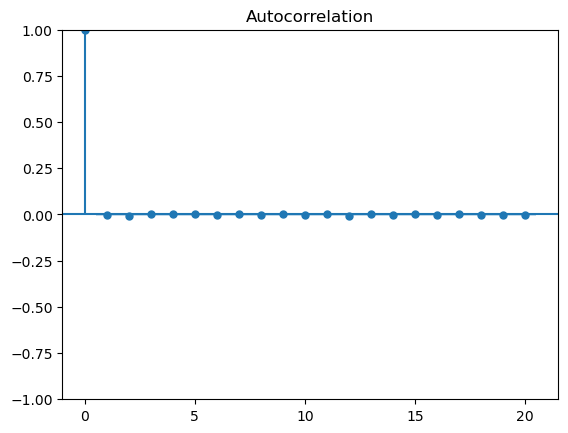

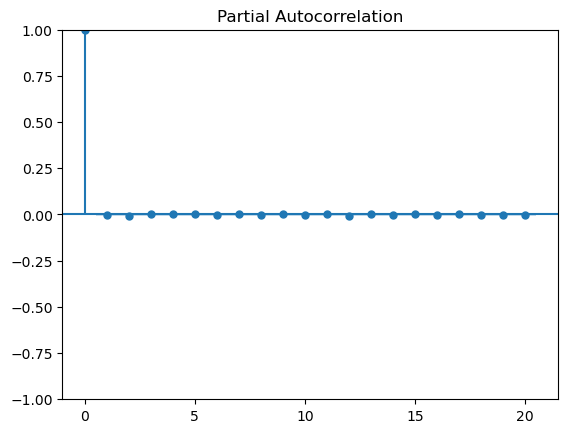

In [10]:
#Autocorrelation Analysis
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

# Compute autocorrelation and plot ACF and PACF
acf_plot = plot_acf(data['metric1'], lags=20)
pacf_plot = plot_pacf(data['metric1'], lags=20)


Seasonality Analysis:     
Decompose the time series using seasonal decomposition to identify seasonal components.

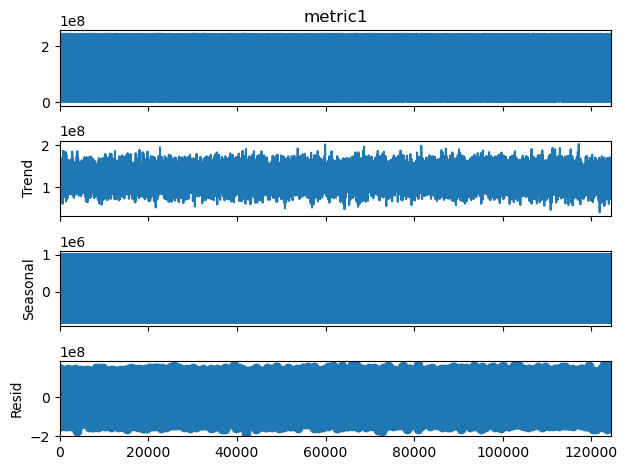

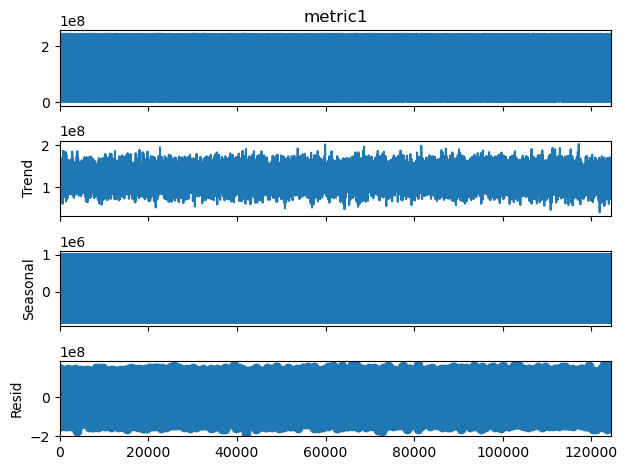

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series using seasonal_decompose
decomposed = seasonal_decompose(data['metric1'], period=13)

# Plot the decomposition components
decomposed.plot()


Trend Analysis:   
Decompose the time series using seasonal decomposition and plot the trend component to analyze the trend over time.

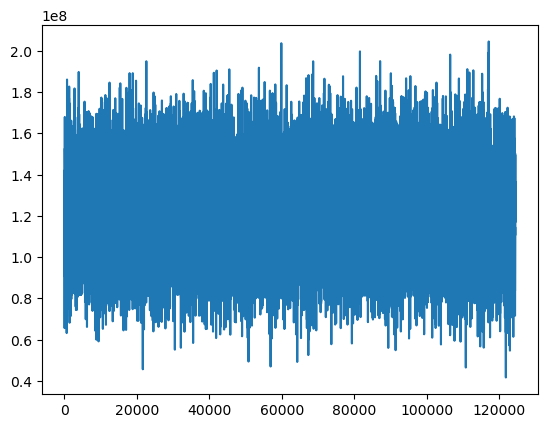

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 
# Decompose the time series using seasonal decomposition
decomposed = seasonal_decompose(data['metric1'], model='additive', period=12)
# Plot the trend component
plt.plot(decomposed.trend)
plt.show()

Step 5: Anomaly Detection

Anomaly detection helps identify unusual patterns or outliers in the data. The following examples demonstrate different methods of anomaly detection.

Statistical Methods:
Calculate z-scores for a specific column and flag data points as anomalies based on z-scores exceeding a threshold.

In [13]:
import numpy as np 
# Calculate z-scores for the 'metric1' column
z_score=(data['metric1']-data['metric1'].mean())/data['metric1'].std()
# Set a threshold for flagging anomalies
threshold=3 # Adjust as per your requirement
# Flag data points as anomalies based on z-scores exceeding the threshold
anomalies=data[z_score>threshold]

Clustering-based Methods:   
Apply clustering algorithms, such as DBSCAN, to identify anomalies as data points in sparsely populated clusters.

In [14]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering to the 'metric1' column
dbscan=DBSCAN(eps=0.5,min_samples=5)
clusters=dbscan.fit_predict(data[['metric1']])
# Identify anomalies as data points in sparsely populated clusters
anomalies=data[clusters==-1]

Machine Learning-based Methods:   
Train machine learning models, such as Isolation Forest, to predict anomalies based on learned patterns in the data.

In [15]:
from sklearn.ensemble import IsolationForest
# Train an Isolation Forest model on the 'metric1' column
isolation_forest=IsolationForest(contamination=0.05)
isolation_forest.fit(data[['metric1']])

# Predict anomalies using the trained model
anomalies= data[isolation_forest.predict(data[['metric1']])==-1]

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Step 6: Model Selection



1.Choose an appropriate machine learning algorithm for predicting equipment failure. You can consider algorithms like Random Forest, Support Vector Machines (SVM), or Gradient Boosting.

2.Adjust the code based on your chosen algorithm and specific requirements.

Step 7: Model Training  

Train the selected machine learning model using the preprocessed data. Split the data into training and testing sets, train the model, make predictions on the testing set, and evaluate the model's performance.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['metric1', 'metric2', 'metric3']], data['failure'], test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

# Make predictions on the testing set
y_pred=clf.predict(X_test)

# Evaluate the model's performance
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)



Accuracy: 0.998513996546046
